**Question 4**
Student : Arora, Sanjana (V00966221)

In [1]:
import pandas as pd
import numpy as np
import sklearn

Please upload the election_clean.csv file provided with the zip package

In [2]:
df = pd.read_csv('elections_clean.csv')
df = df.drop(['Unnamed: 0'], axis=1)


In [3]:
df.head()
df.columns

Index(['votes', 'UnemploymentRate2015', 'MedHHInc2014', 'PerCapitaInc',
       'PovertyAllAgesPct2014', 'Deep_Pov_All', 'Population',
       'Area in square miles - Total area', 'PopDensity', 'TOT_MALE_rate',
       'TOT_FEMALE_rate', 'voter_turnout_rate', 'Democrat', 'State', 'County',
       'Education', 'Religion', 'Old', 'Young', 'Adult', 'EthnicMale',
       'EthnicFemale'],
      dtype='object')

To make direct comparisons between the manually coded tree in Question 2 and the tree derived by using sklearn library, I am using the same features as that of Question 2. Also, I am using entropy based split criteria.

In [4]:
subset = df[['Education', 'Religion', 'EthnicMale','EthnicFemale']].copy()

In [5]:
df_transformed = pd.get_dummies(subset)
len(df_transformed.columns)

17

In [6]:
from sklearn import tree
X = df_transformed.loc[:,:]
Y = df['Democrat']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7,shuffle=True, random_state=42)
# Instantiation
clf = tree.DecisionTreeClassifier(criterion= 'entropy',random_state=42)
#Fitting the model
clf = clf.fit(X_train, Y_train)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
y_pred2 = clf.predict(X_train)
y_pred = clf.predict(X_test)
print('The accuracy score:', accuracy_score(Y_test, y_pred))
print('The Mean Absolute Error for testing set:', mean_absolute_error(Y_test, y_pred))
print('The Mean Absolute Error for training set:', mean_absolute_error(Y_train, y_pred2))

The accuracy score: 0.9057203389830508
The Mean Absolute Error for testing set: 0.09427966101694915
The Mean Absolute Error for training set: 0.0854157201272149


In [8]:
dot_data = tree.export_graphviz(clf,out_file=None)

As it can be visualized from the image below, the tree created by using the sklearn library utlizes more number of features (17) as compared to the number of features (4) utlized for question 2 due to one hot encoding used in this question. However, by one hot encoding a categorical variable we are causing sparsity into the dataset because for a dummy variable there is only 1 possible split. While using categorical variables with more than 2 level we have a choice of choosing from a larger number of splits.

The accuracy of the decision tree created in Question 2 is slightly higher than the accuracy of the tree created by the sklearn library.

While the MAE for training and validation sets is comparatively lower for the decision tree made by using the library.

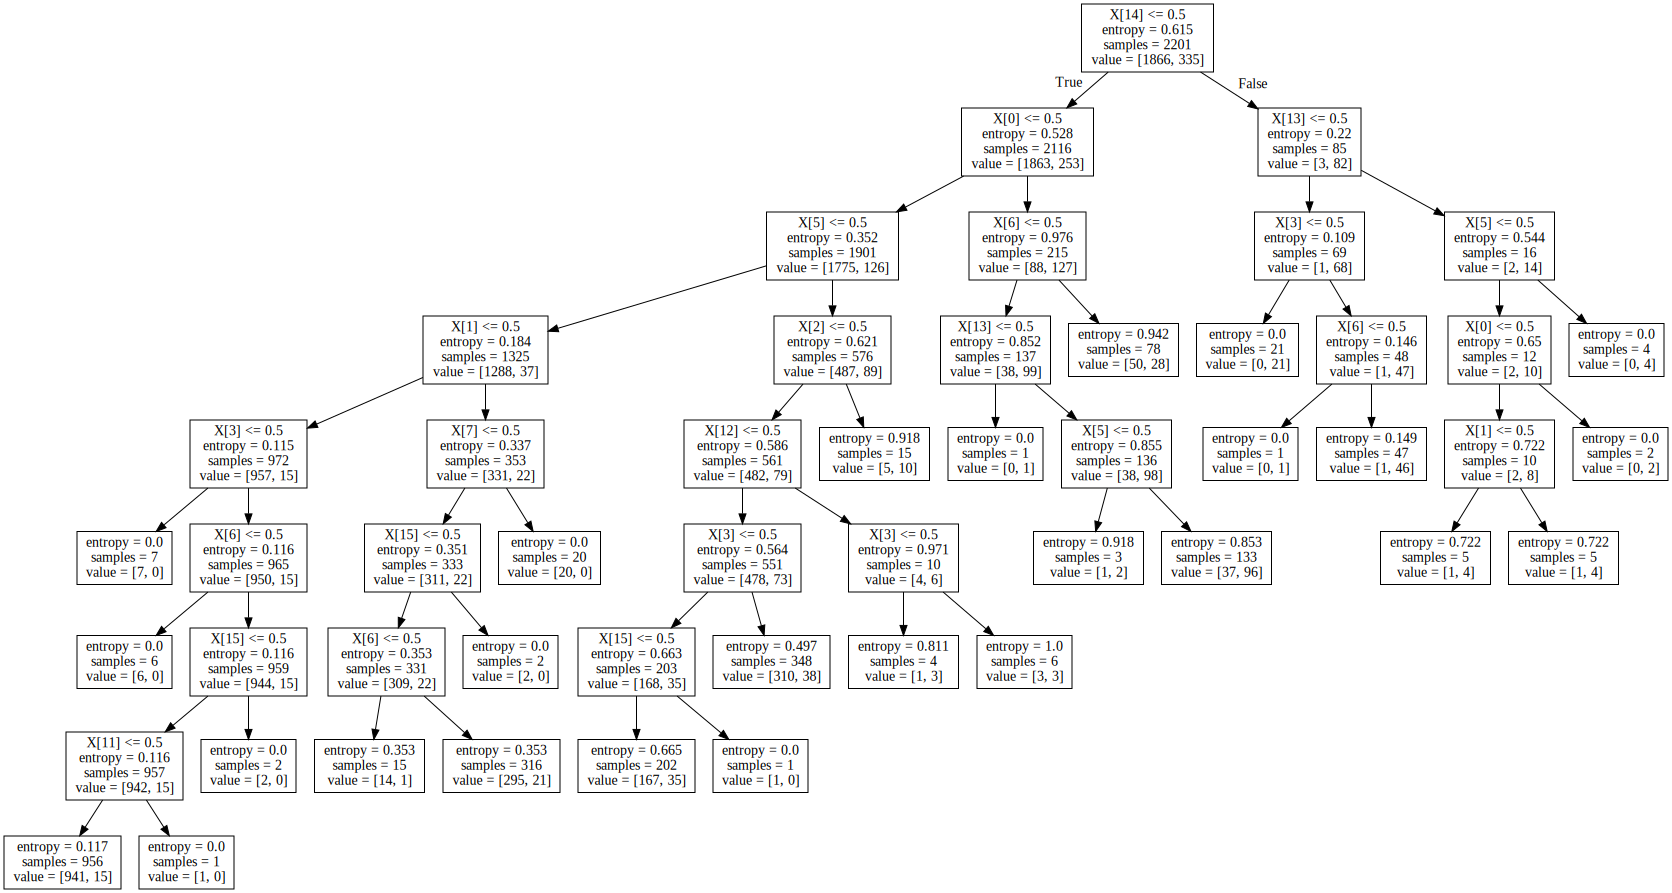

In [9]:
import graphviz
graph = graphviz.Source(dot_data)
graph